# Marketing Campaigns


## 1. Business Understanding

### Problem scenario: 
Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

### Problem objective:
As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

### Data description:
The variables such as birth year, education, income, and others pertain to the first 'P' or 'People' in the tabular data presented to the user. The expenditures on items like wine, fruits, and gold, are associated with ‘Product’. Information relevant to sales channels, such as websites and stores, is connected to ‘Place’, and the fields discussing promotions and the outcomes of various campaigns are linked to ‘Promotion’.


Steps to perform:

	
	

    
	•	Test the following hypotheses:
	•	Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
	•	Customers with children likely experience time constraints, making online shopping a more convenient option.
	•	Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
	•	Does the United States significantly outperform the rest of the world in total purchase volumes?


	•	Use appropriate visualization to help analyze the following:
	•	Identify the top-performing products and those with the lowest revenue.
	•	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
	•	Determine the country with the highest number of customers who accepted the last campaign.
	•	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.
	•	Analyze the educational background of customers who lodged complaints in the last two years.



In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For better visualizations
plt.style.use('ggplot')
sns.set(style="whitegrid")

## Dataset Overview

In [347]:
# Read data
df = pd.read_csv("data/marketing_data.csv")

# Display basic information
print(f"Dataset Shape: {df.shape}")
df.info(memory_usage="deep")

Dataset Shape: (2240, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non

## 2.2 Data Quality Assessment
Before drawing conclusions from the data, we need to assess its quality. Poor data quality can lead to inaccurate analysis and misleading insights.

We'll assess four key dimensions of data quality:

__Completeness__: Are there missing values?
__Correctness__: Are there outliers, duplicates, or invalid values?
__Relevance__: Are the variables distributed in a way that's useful for analysis?
__Trustworthiness__: Are there inconsistencies between related variables? Are data sources reliable?

### 2.2.1 Categorical Values Assessment

In [348]:
# Display basic statistics for numerical columns
print("Summary Statistics for Categorical Variables:")
df.describe(include='O').T

Summary Statistics for Categorical Variables:


,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Income,2216,1974,"$7,500.00",12
Dt_Customer,2240,663,8/31/12,12
Country,2240,8,SP,1095


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*Dataset has 23 numeric columns and 5 sting columns.*

*Education, Marital_Status and Country are the categorical variables.*

*Income  should be cast to float. Income has missing values*

*Dt_Customer should be cast to date.*

*Almost 40% of data has Country=SP*


In [349]:
# cast money to float
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)
# caste to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

In [350]:
print(f'Education unique values: {df["Education"].drop_duplicates().to_list()}')
print(f'Marital_Status unique values: {df["Marital_Status"].drop_duplicates().to_list()}')
print(f'Country unique values: {df["Country"].drop_duplicates().to_list()}')

df['Education'].value_counts()

Education unique values: ['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']
Marital_Status unique values: ['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone', 'Absurd']
Country unique values: ['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME']


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [351]:
# Update Education '2n Cycle' with Masters (according to the internet it seems mean the same)

def education_map(x):
    if x in ('Graduation', 'Master', '2n Cycle'):
        return 'Graduate'
    else:
        return x
        
def marital_status_map(x):
    if x in ('Married','Togather'):
        return 'Married'
    else:
        return 'Single'
    
df['Education'] = df['Education'].apply(education_map)
# Update Marital_Status with 2 categories Single and Married
df['Marital_Status'] = df['Marital_Status'].apply(marital_status_map)

In [352]:
# encode Education and marital status
from feature_engine.encoding import OrdinalEncoder
od = OrdinalEncoder(encoding_method='arbitrary')
df = od.fit_transform(df)

### 2.2.2 Numerical values Assessment

In [353]:
from datetime import datetime
#Create variables to represent the total number of children, age, and total spending.
df['Children'] = df['Kidhome'] + df['Teenhome']
#Derive the total purchases from the number of transactions across the three channels.
df['NumAllChannelsPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
# Age
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']


In [354]:
print("Statistical analysis:")
df.describe().T

Statistical analysis:


,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Education,2240.0,0.265179,0.0,0.0,0.0,0.0,2.0,0.493135
Marital_Status,2240.0,0.385714,0.0,0.0,0.0,1.0,1.0,0.486872
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__Year_Birth__:  min=1893 looks like outlier std=12 and mean=1970, so we need to filter out rows customers that birth earlier than 1934, which are 91 years old. Looks reasonable but customers may be older still, so we will check later.*
*__Income__: has missing values*
*__MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds__: data is left skewed and potentially has outliers*
*__AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain__: boolean values that may be equal to 0 or 1, tending to zeros*


In [355]:
# reduce memory usage
df['AcceptedCmp3']  = df['AcceptedCmp3'].astype('uint8')
df['AcceptedCmp4']  = df['AcceptedCmp4'].astype('uint8')
df['AcceptedCmp5']  = df['AcceptedCmp5'].astype('uint8')
df['AcceptedCmp1']  = df['AcceptedCmp1'].astype('uint8')
df['AcceptedCmp2']  = df['AcceptedCmp2'].astype('uint8')
df['Response']  = df['Response'].astype('uint8')
df['Complain']  = df['Complain'].astype('uint8')
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Education                2240 non-null   int64         
 3   Marital_Status           2240 non-null   int64         
 4   Income                   2216 non-null   float64       
 5   Kidhome                  2240 non-null   int64         
 6   Teenhome                 2240 non-null   int64         
 7   Dt_Customer              2240 non-null   datetime64[ns]
 8   Recency                  2240 non-null   int64         
 9   MntWines                 2240 non-null   int64         
 10  MntFruits                2240 non-null   int64         
 11  MntMeatProducts          2240 non-null   int64         
 12  MntFishProducts          2240 non-

### 2.2.3 Missing Values Analysis

Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. 
It may be necessary to cleanse the data before proceeding. 
Specifically, scrutinize the categories of education and marital status for data cleaning.

In [356]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

print("Missing Values Analysis:")
missing_values_filter = missing_df['Missing Values'] > 0
print(missing_df[missing_values_filter].sort_values(by='Percentage', ascending=False))

Missing Values Analysis:
        Missing Values  Percentage
Income              24        1.07


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 
*__Income__ has ~1% of missing values and data is skewed to right and it has 1 outlier*  

In [357]:
# Fillna with avg income val by Education and Marital_Status
income_imputer_df = df.groupby(['Education', 'Marital_Status'])['Income'].mean()
tmp_df = pd.merge(df, income_imputer_df, how='left', on=['Education', 'Marital_Status'])
tmp_df['Income'] = tmp_df['Income_x'].fillna(tmp_df['Income_y'])
df = tmp_df.drop(['Income_x', 'Income_y'], axis=1)
df['Income'].describe()

count      2240.000000
mean      52257.575038
std       25038.769696
min        1730.000000
25%       35538.750000
50%       51550.000000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

### 2.2.3 Outliers check

#### Year_Birth

<Axes: xlabel='Year_Birth', ylabel='Count'>

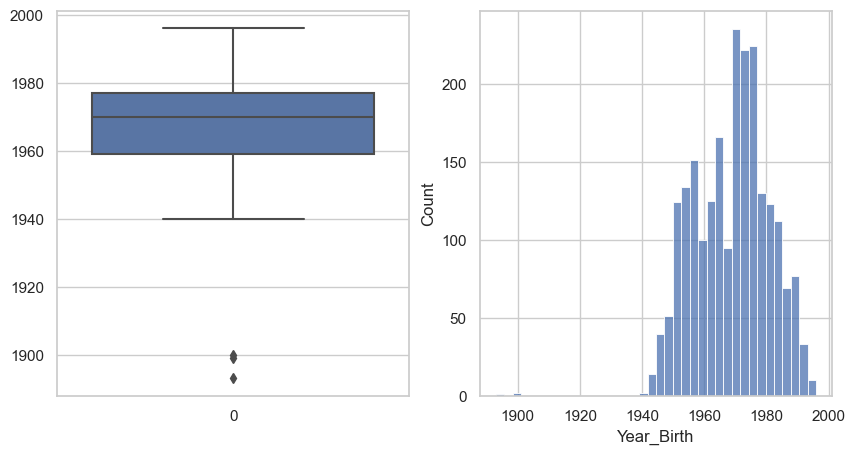

In [358]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.boxplot(df['Year_Birth'], ax=axes[0])
sns.histplot(df['Year_Birth'], ax=axes[1])


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__Year_Birth__: has outliers, data looks biased as we have more clients birth between 1970s and 1980s, which may reflect the country's population distribution*

In [359]:
# Filter out clients that older than 100
df = df[df['Year_Birth'] > 1925]

#### Income

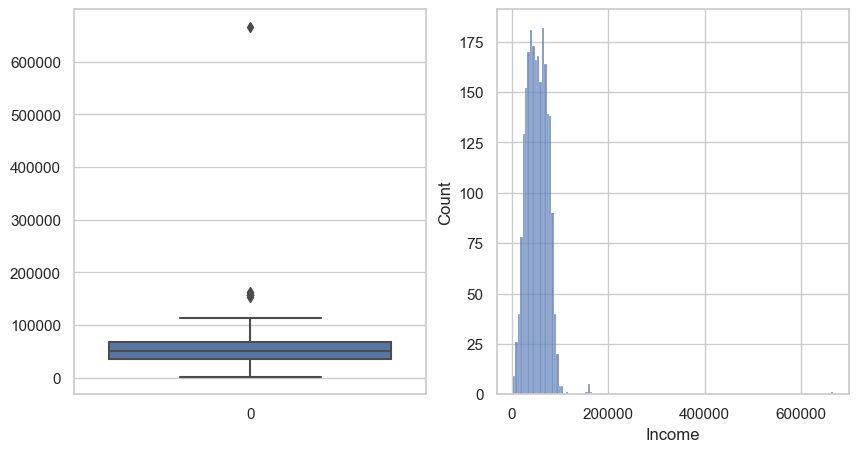

In [360]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.boxplot(df['Income'], ax=axes[0])
sns.histplot(df['Income'], ax=axes[1])
plt.show()

#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 
*__Income__:  has outlier above 600 000*

In [361]:
# replaced outlier with tail value
from feature_engine.outliers import Winsorizer
print('Before: \n' + str(df['Income'].describe()))
capper = Winsorizer(capping_method='gaussian',
                    tail='right',
                    fold=5,
                    variables=['Income'])

df= capper.fit_transform(df)
print('\n')
print('After: \n' + str(df['Income'].describe()))

Before: 
count      2237.000000
mean      52247.033565
std       25044.089829
min        1730.000000
25%       35523.000000
50%       51537.000000
75%       68281.000000
max      666666.000000
Name: Income, dtype: float64


After: 
count      2237.000000
mean      52028.335975
std       21571.625108
min        1730.000000
25%       35523.000000
50%       51537.000000
75%       68281.000000
max      177439.491104
Name: Income, dtype: float64


### Other columns

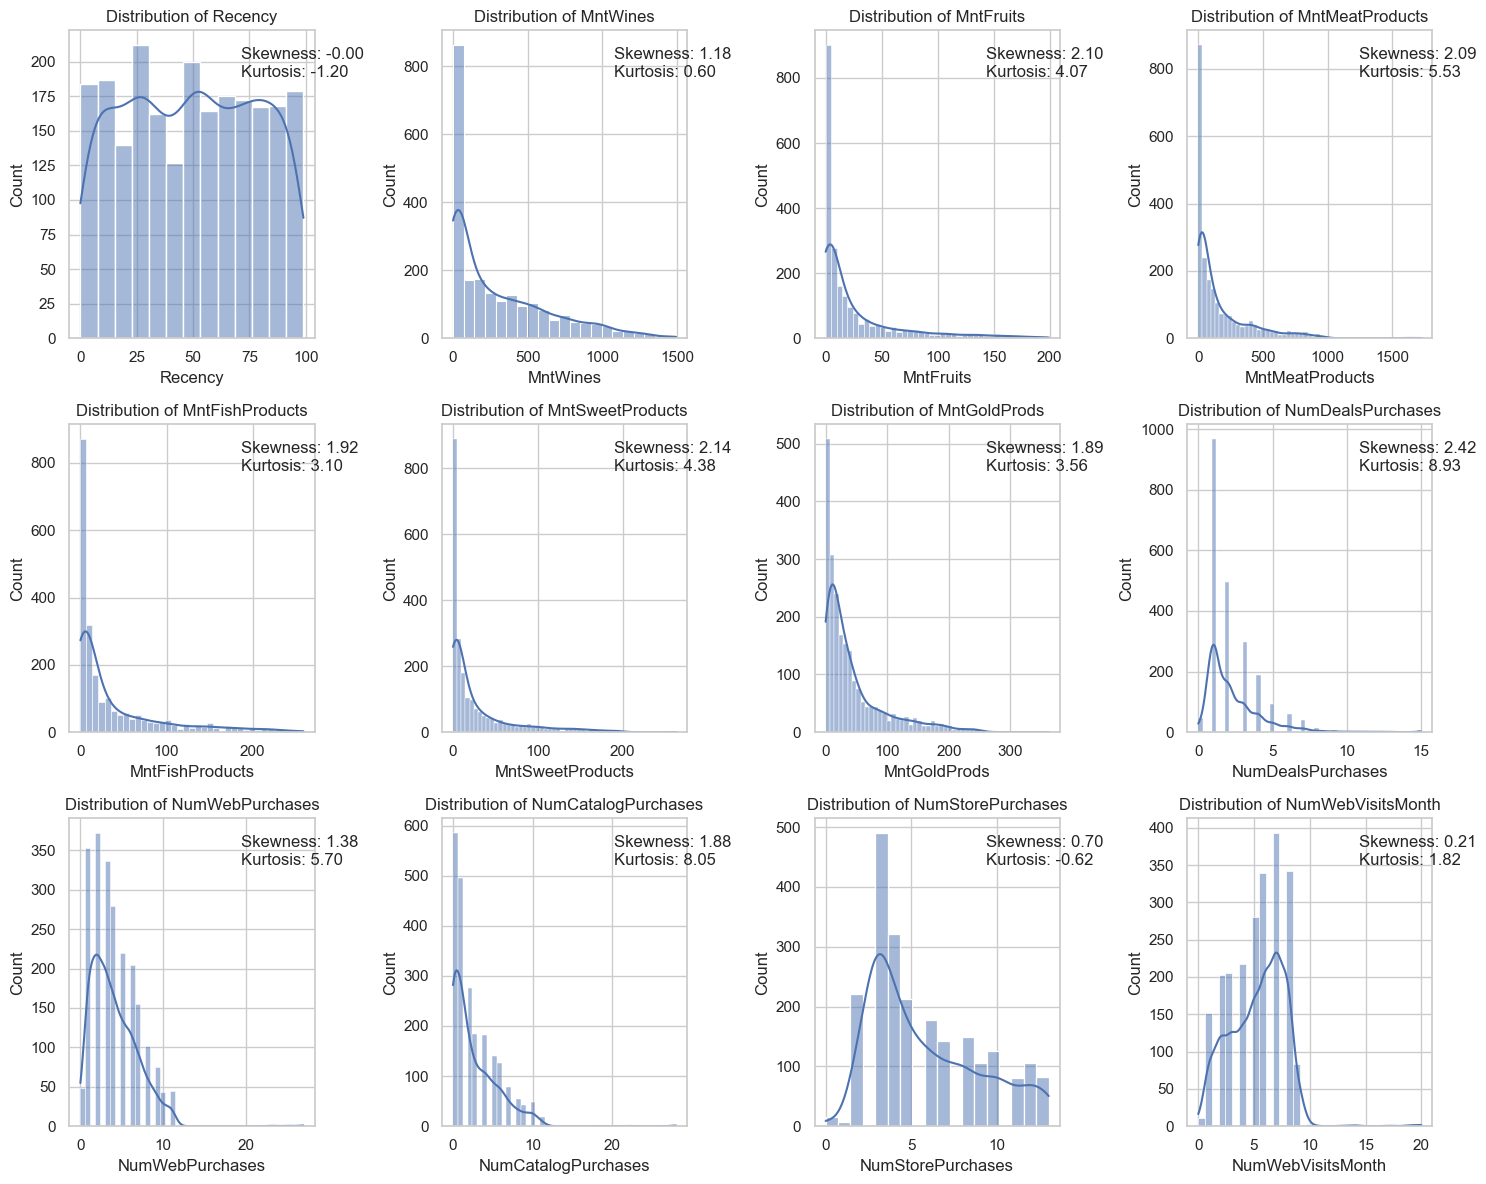

In [362]:
# Visualize distributions of key numerical variables
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
cols = ['Recency', 'MntWines', 'MntFruits', 
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
for i, col in enumerate(cols):
    if i < len(axes):
        if df[col].notna().any():  # Only plot columns with non-null values
            sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')

            # Add skewness and kurtosis
            skewness = df[col].skew()
            kurtosis = df[col].kurt()
            axes[i].annotate(f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
                             xy=(0.7, 0.85), xycoords='axes fraction')

plt.tight_layout()
plt.show()

#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__Recency__: looks like uniform distribution*
*Mnt columns data is left skewed and more looks like Poisson (exponential) distribution but Purchases columns data has tendency to Log-Normal distribution*

## 3. Generate a heatmap to illustrate the correlation between different pairs of variables.

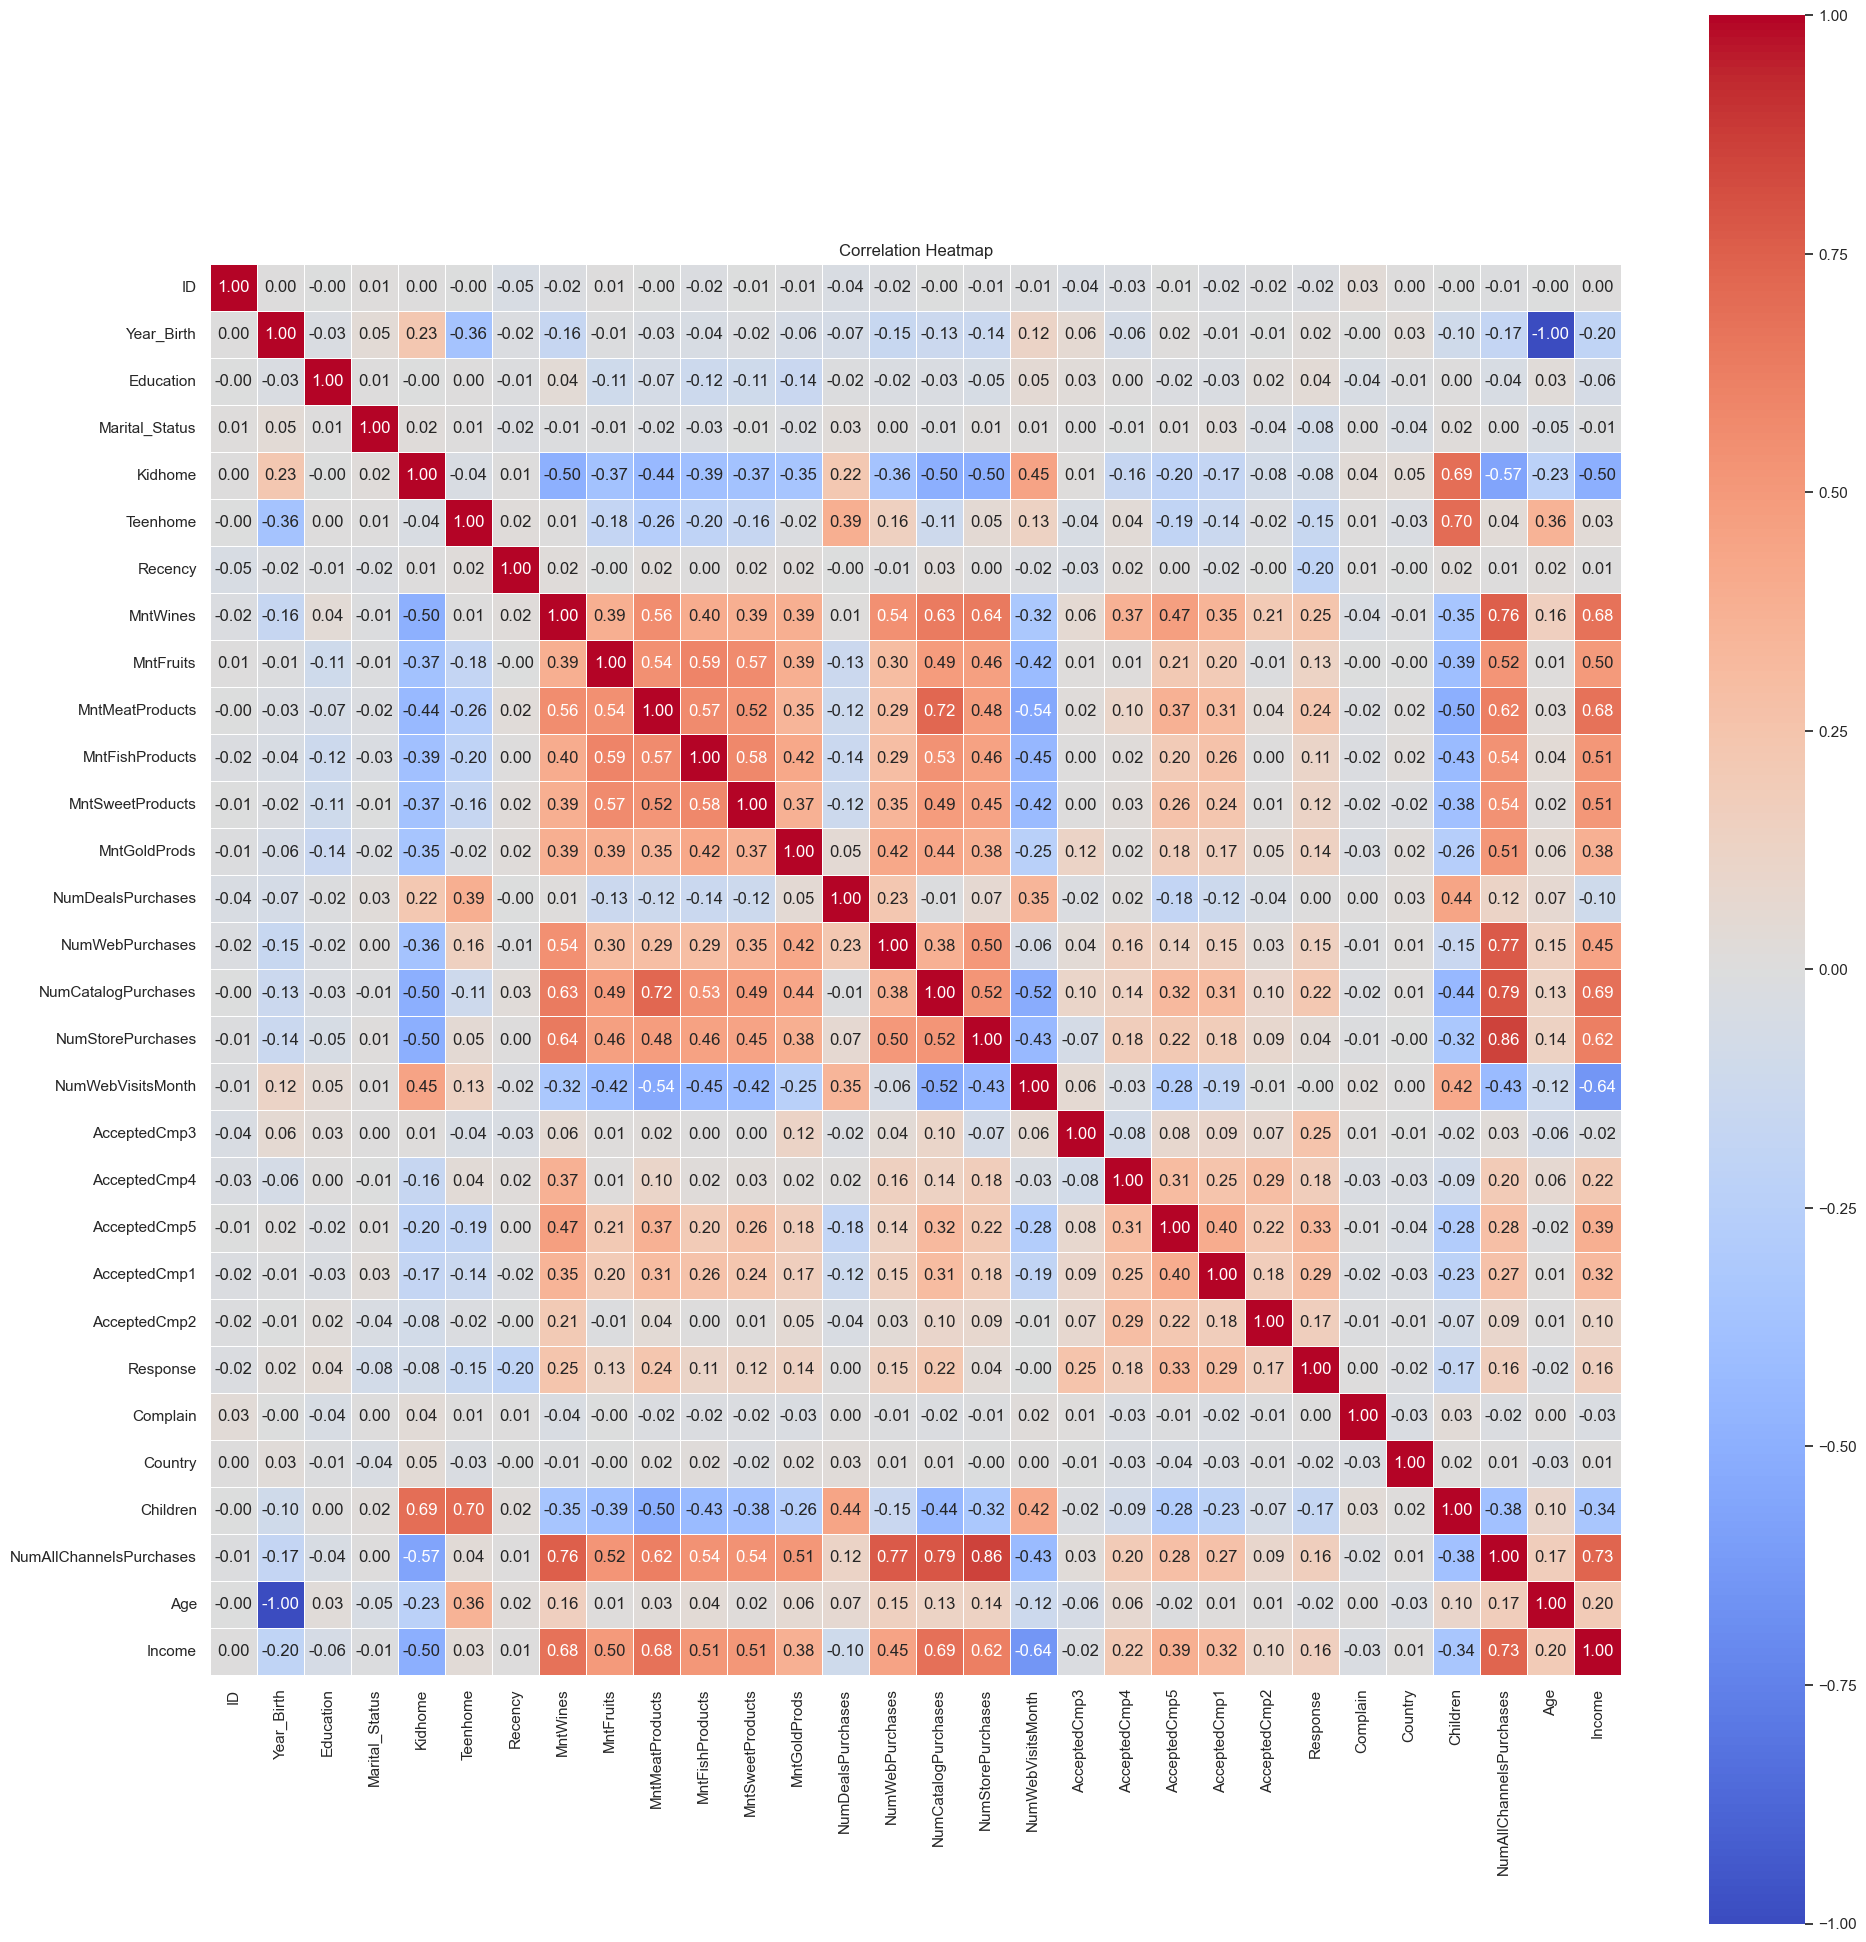

In [364]:
corr = df.corr(numeric_only=True)

# Generate heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()